In [67]:
import time
import numpy as np
import pandas as pd
from scipy.stats import norm
from collections import Counter

# plotting packages
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

from sklearn.preprocessing import RobustScaler # RobustScaler is less prone to outliers.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import make_pipeline

# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# imbalanced package
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Evaluation metrics
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve

# evaluation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit, learning_curve

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/01_raw/creditcard.csv")
print(df.shape)
print(df.columns)
df.head()

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check missing values
df.isnull().sum().max()

0

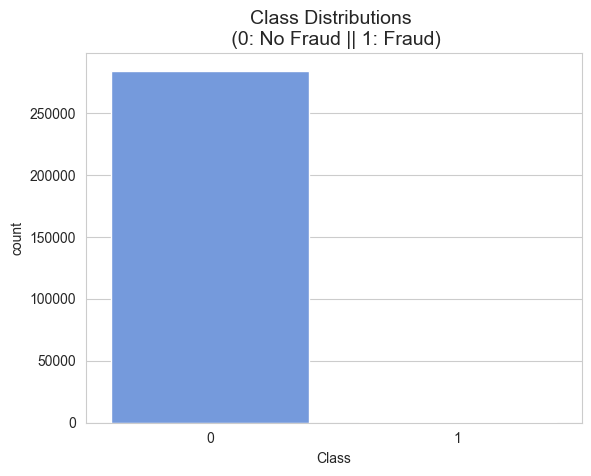

In [5]:
colors = ["cornflowerblue", "orange"]

sns.countplot(data=df, x="Class", palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
df[df["Amount"]<1000]['Amount'].describe()

count    281738.000000
mean         69.988003
std         126.432116
min           0.000000
25%           5.450000
50%          21.110000
75%          74.800000
max         999.900000
Name: Amount, dtype: float64

/var/folders/hl/4s_chnn92xd9x4ljbgc5nwnr0000gn/T/ipykernel_35542/677381480.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='cornflowerblue')
/var/folders/hl/4s_chnn92xd9x4ljbgc5nwnr0000gn/T/ipykernel_35542/677381480.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

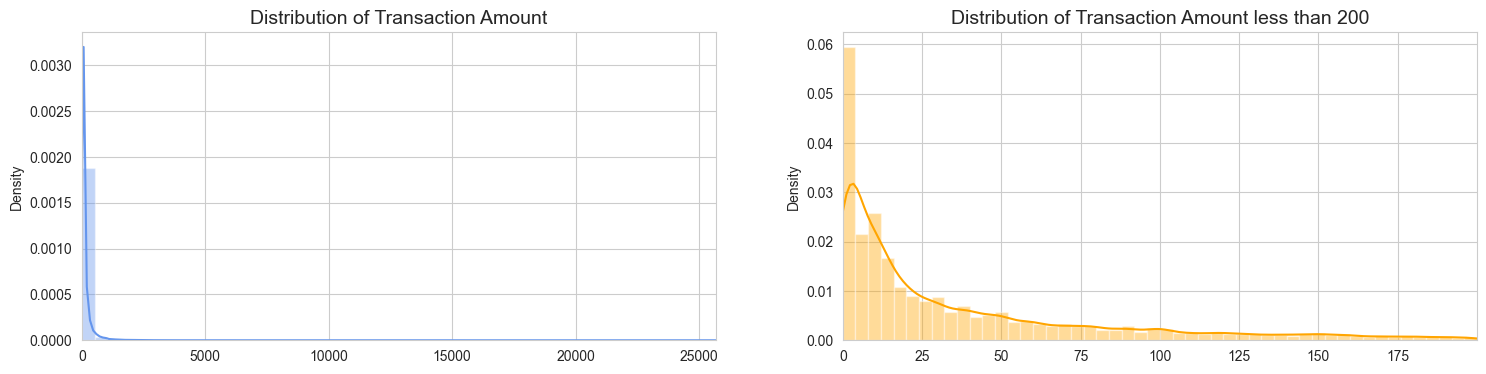

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
amt_less_1k = df[df["Amount"]<200]['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='cornflowerblue')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(amt_less_1k, ax=ax[1], color='orange')
ax[1].set_title('Distribution of Transaction Amount less than 200', fontsize=14)
ax[1].set_xlim([min(amt_less_1k), max(amt_less_1k)])

plt.show();

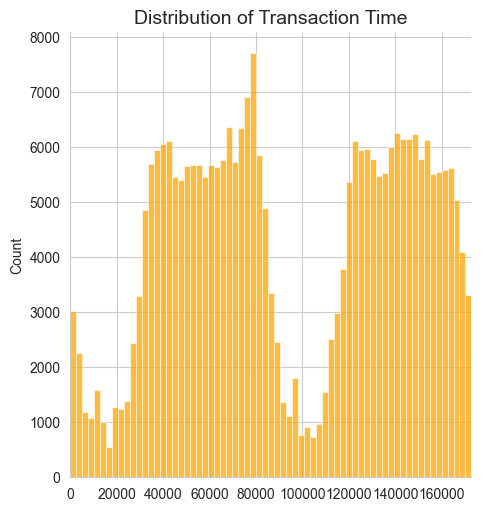

In [10]:
time_val = df['Time'].values
sns.displot(time_val, color='orange')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_val), max(time_val)])

plt.show();

In [11]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
# Split train test
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


### Under sampling

For imbalances dataset, we need to:
- Perform imbalance analysis: what's the ratio
- Under sampling/ over sampling to make them equivalent in order to have a normal distribution of the classes.
- Pros and Cons of each method

In [14]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [15]:
# Shuffle the dataset before creating subsample

df = df.sample(frac=1)

# amount of fraud classes: 492
fraud_df = df.loc[df["Class"]==1]
non_fraud_df = df.loc[df["Class"]==0][:492]

normal_dist_df = pd.concat([fraud_df, non_fraud_df])

# shuffle 
new_df = normal_dist_df.sample(frac=1, random_state=42)

print(f"Number of non frauds transaction is {new_df['Class'].value_counts()[0]}, {round(new_df['Class'].value_counts()[0]/len(new_df) * 100,2)} % of the dataset")
print(f"Number of frauds transaction is {new_df['Class'].value_counts()[1]}, {round(new_df['Class'].value_counts()[0]/len(new_df) * 100,2)} % of the dataset")

new_df.head()

Number of non frauds transaction is 492, 50.0 % of the dataset
Number of frauds transaction is 492, 50.0 % of the dataset


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
65640,0.305177,-0.387798,-0.800489,-0.026310,0.225101,-0.853928,1.473778,3.995459,-1.061755,1.561512,...,0.280370,-0.083087,-0.409320,0.078077,1.083020,-0.486908,1.027433,-0.016113,0.026804,0
128479,0.530986,-0.070102,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
195500,1.383218,0.545049,1.641646,-0.913245,-1.003422,-0.143130,0.402054,1.732572,-0.565727,0.553853,...,-0.039708,-0.232271,-0.683366,0.409807,-0.763079,-0.719542,-0.354671,0.023975,-0.038570,0
124087,-0.293440,-0.088359,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,...,-0.023576,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1
6870,-0.293440,-0.892104,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1


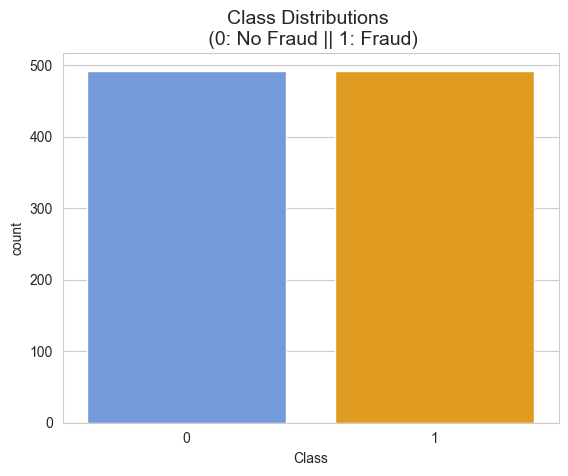

In [16]:
colors = ["cornflowerblue", "orange"]

sns.countplot(data=new_df, x="Class", palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

### New data set exploration:

- Correlation
- Anomaly analysis

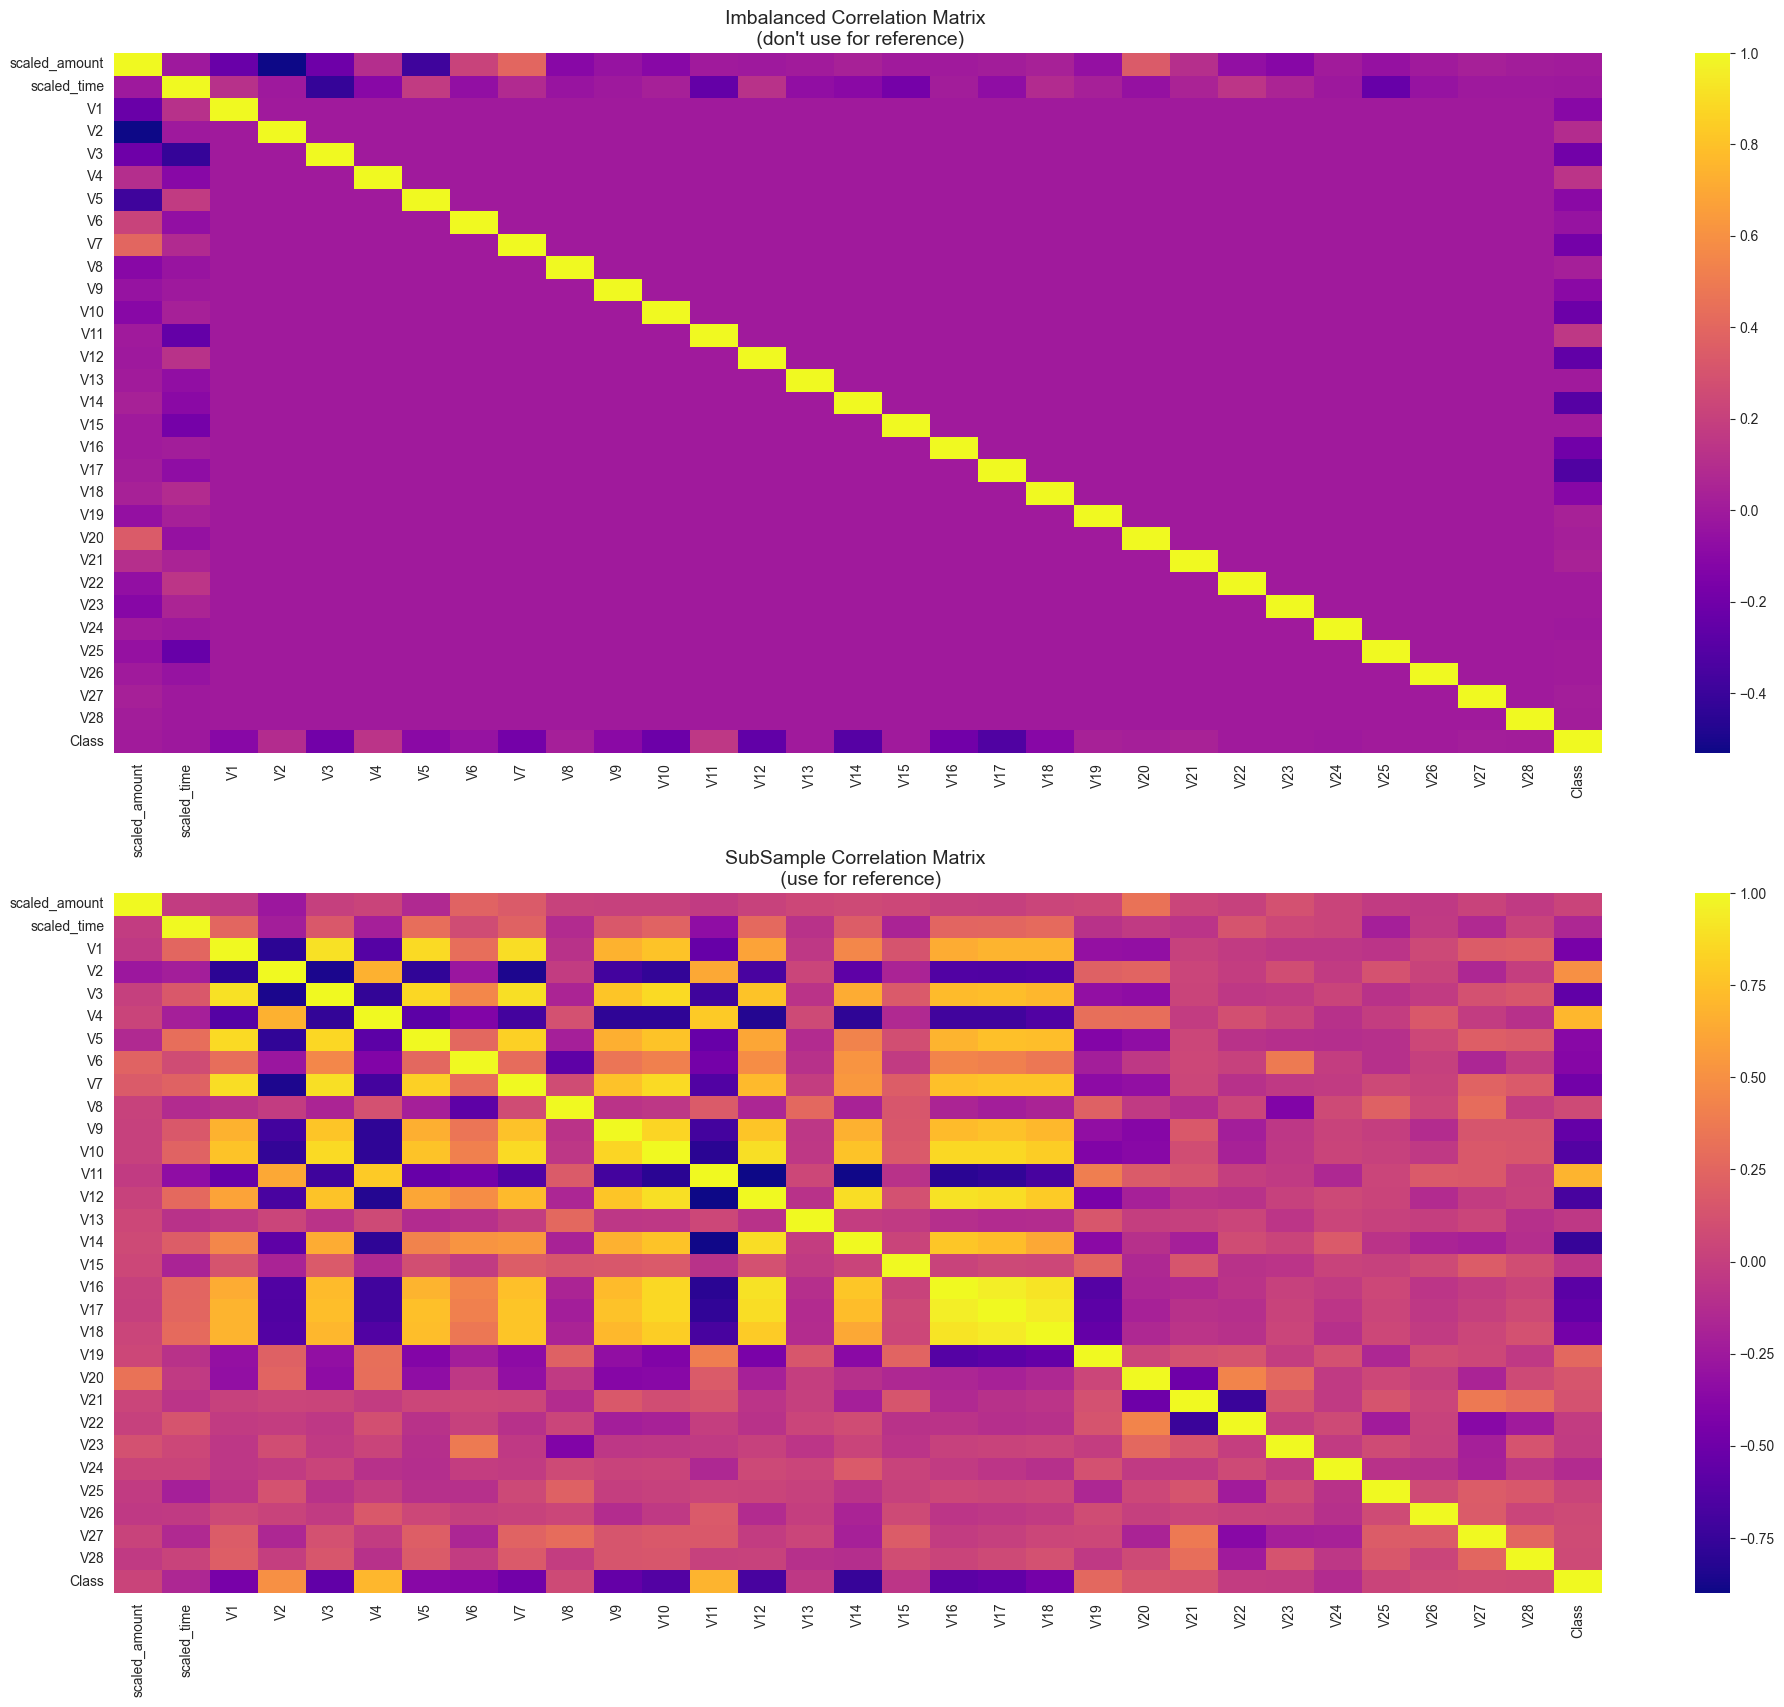

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='plasma', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='plasma', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### Negative Correlations

V10, V12, V14 and V16, V17 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

#### Positive Correlations

V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

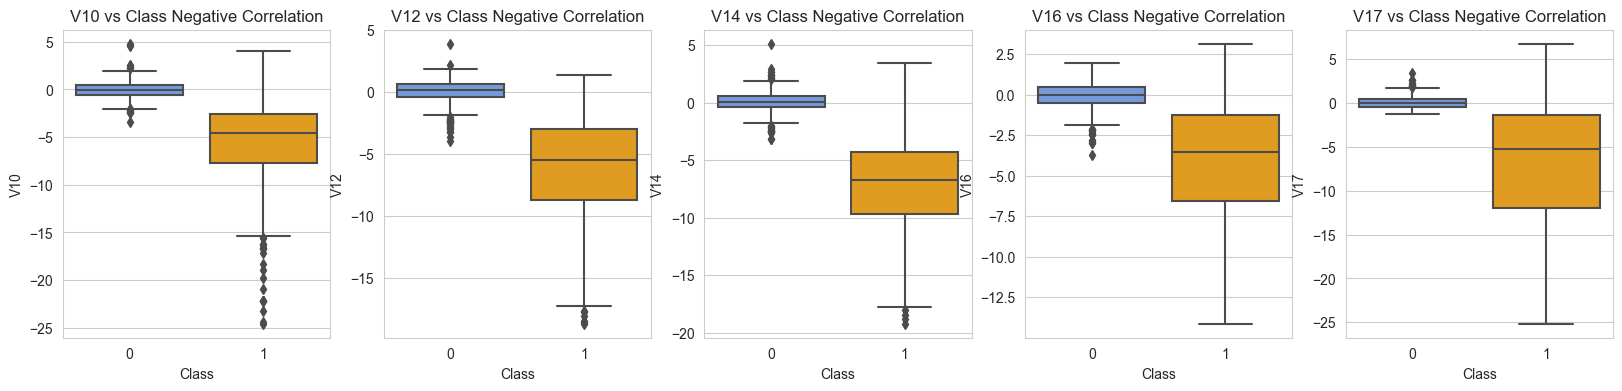

In [18]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[4])
axes[4].set_title('V17 vs Class Negative Correlation')

plt.show()

#### BoxPlots show the diffences in distribution of these features in fraudulent and non fraudulent transactions.

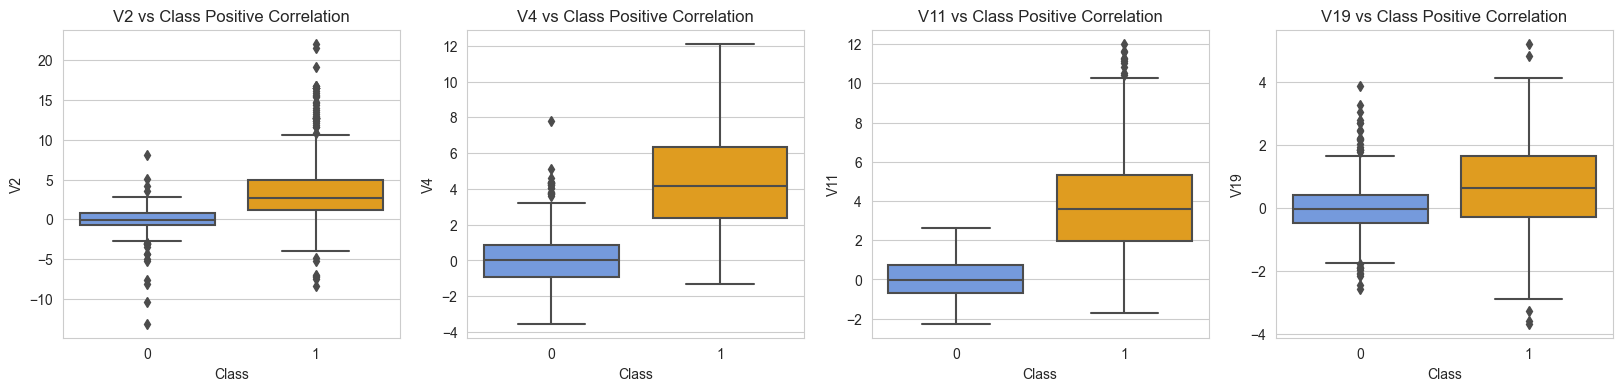

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Compare to the box plot of a feature that doesn't have much impact on the label

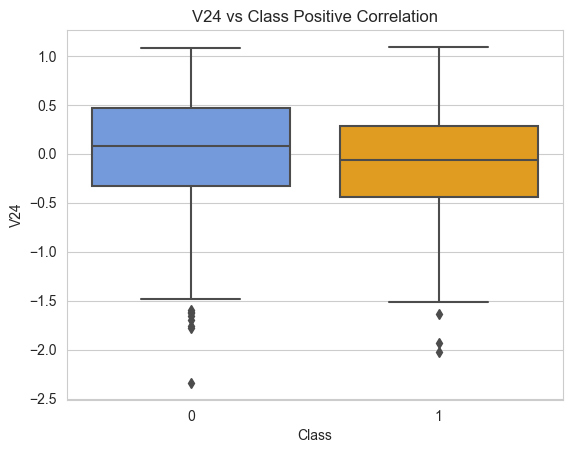

In [20]:
sns.boxplot(x="Class", y="V24", data=new_df, palette=colors)
plt.title('V24 vs Class Positive Correlation');

### Anomaly detection

/var/folders/hl/4s_chnn92xd9x4ljbgc5nwnr0000gn/T/ipykernel_35542/2064943209.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='orange')
/var/folders/hl/4s_chnn92xd9x4ljbgc5nwnr0000gn/T/ipykernel_35542/2064943209.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

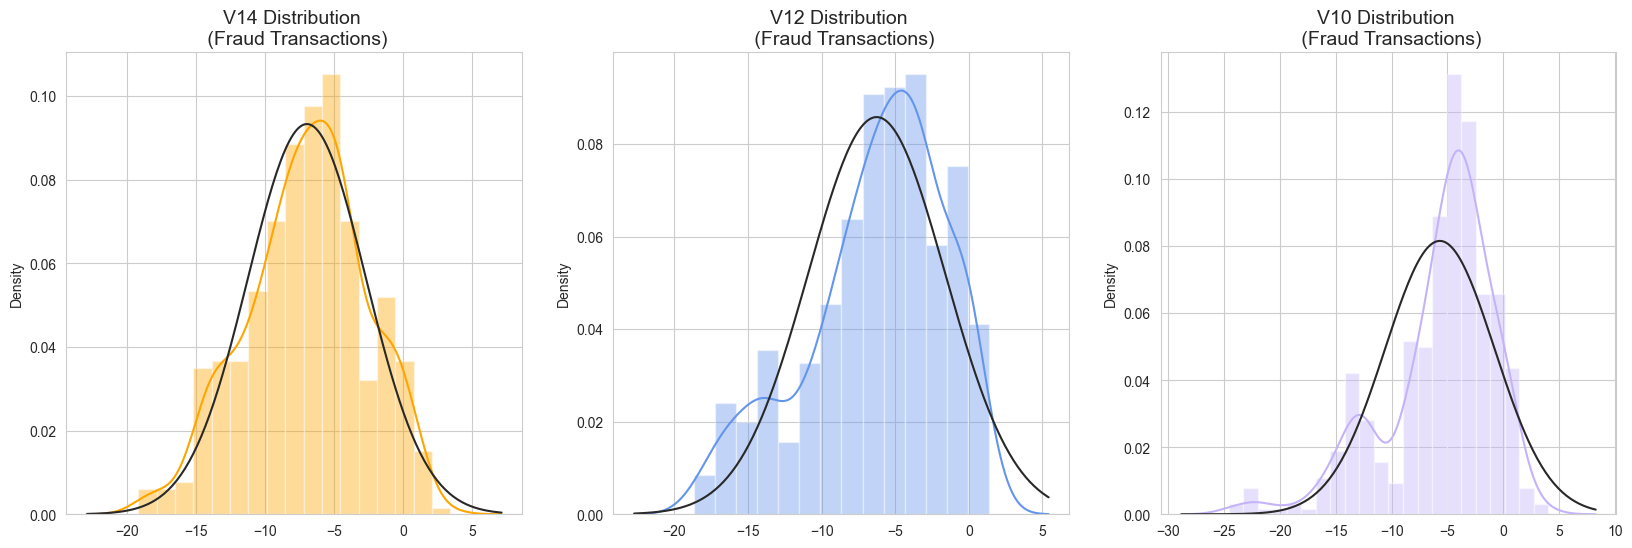

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='orange')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='cornflowerblue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show();

In [22]:
# Removing outliers
v14_fraud = new_df["V14"].loc[new_df["Class"] == 1].values

q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f"Quartile 25: {q25}, Quartile 75: {q75} \n")

v14_iqr = q75 - q25
print(f"IQR: {v14_iqr} \n")

v14_cutoff = v14_iqr * 1.5  # common rule of 1.5
v14_lower, v14_upper = q25 - v14_cutoff, q75 + v14_cutoff
print(f"Cut off: {v14_cutoff}")
print(f"V14 Lower bound: {v14_lower}")
print(f"V14 Upper bound: {v14_upper}")

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print(f"There are {len(outliers)} outliers of Feature V14 for fraud Cases: {outliers}")

new_df = new_df.drop(new_df[(new_df["V14"] > v14_upper) | (new_df["V14"] < v14_lower)].index)
new_df.head()

Quartile 25: -9.692722964972386, Quartile 75: -4.282820849486865 

IQR: 5.409902115485521 

Cut off: 8.114853173228282
V14 Lower bound: -17.807576138200666
V14 Upper bound: 3.8320323237414167
There are 4 outliers of Feature V14 for fraud Cases: [-18.8220867423816, -18.0499976898594, -18.4937733551053, -19.2143254902614]


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
65640,0.305177,-0.387798,-0.800489,-0.026310,0.225101,-0.853928,1.473778,3.995459,-1.061755,1.561512,...,0.280370,-0.083087,-0.409320,0.078077,1.083020,-0.486908,1.027433,-0.016113,0.026804,0
128479,0.530986,-0.070102,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
195500,1.383218,0.545049,1.641646,-0.913245,-1.003422,-0.143130,0.402054,1.732572,-0.565727,0.553853,...,-0.039708,-0.232271,-0.683366,0.409807,-0.763079,-0.719542,-0.354671,0.023975,-0.038570,0
124087,-0.293440,-0.088359,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,...,-0.023576,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1
6870,-0.293440,-0.892104,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1


In [23]:
v12_fraud = new_df["V12"].loc[new_df["Class"]==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)

v12_iqr = q75 - q25
v12_cutoff = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cutoff, q75 + v12_cutoff

print(f"V12 lower: {v12_lower}")
print(f"V12 upper: {v12_upper}")

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]

print(f"There are {len(outliers)} V12 outliers: {outliers}")

new_df = new_df.drop(new_df[(new_df["V12"] < v12_lower) | (new_df["V12"] > v12_upper)].index)
new_df.head()

V12 lower: -17.3430371579634
V12 upper: 5.776973384895937
There are 4 V12 outliers: [-18.6837146333443, -18.4311310279993, -18.0475965708216, -18.5536970096458]


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
65640,0.305177,-0.387798,-0.800489,-0.026310,0.225101,-0.853928,1.473778,3.995459,-1.061755,1.561512,...,0.280370,-0.083087,-0.409320,0.078077,1.083020,-0.486908,1.027433,-0.016113,0.026804,0
128479,0.530986,-0.070102,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
195500,1.383218,0.545049,1.641646,-0.913245,-1.003422,-0.143130,0.402054,1.732572,-0.565727,0.553853,...,-0.039708,-0.232271,-0.683366,0.409807,-0.763079,-0.719542,-0.354671,0.023975,-0.038570,0
124087,-0.293440,-0.088359,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,...,-0.023576,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1
6870,-0.293440,-0.892104,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1


In [24]:
v10_fraud = new_df["V10"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cutoff = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cutoff, q75 + v10_cutoff
print(f"V10 Lower: {v10_lower}")
print(f"V10 Upper: {v10_upper}")

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print(f"There are {len(outliers)} v10 feature outliers: {outliers}")

new_df = new_df.drop(new_df[(new_df["V10"] < v10_lower) | (new_df["V10"] > v10_upper)].index)
print(new_df.shape)
new_df.head()

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
There are 27 v10 feature outliers: [-16.3035376590131, -24.5882624372475, -16.6496281595399, -16.7460441053944, -17.1415136412892, -22.1870885620007, -15.2318333653018, -20.9491915543611, -22.1870885620007, -24.4031849699728, -18.2711681738888, -15.1237521803455, -15.5637913387301, -16.2556117491401, -18.9132433348732, -16.6011969664137, -15.2399619587112, -14.9246547735487, -14.9246547735487, -19.836148851696, -22.1870885620007, -22.1870885620007, -15.2399619587112, -15.3460988468775, -15.1241628144947, -15.5637913387301, -23.2282548357516]
(948, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
65640,0.305177,-0.387798,-0.800489,-0.026310,0.225101,-0.853928,1.473778,3.995459,-1.061755,1.561512,...,0.280370,-0.083087,-0.409320,0.078077,1.083020,-0.486908,1.027433,-0.016113,0.026804,0
128479,0.530986,-0.070102,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
195500,1.383218,0.545049,1.641646,-0.913245,-1.003422,-0.143130,0.402054,1.732572,-0.565727,0.553853,...,-0.039708,-0.232271,-0.683366,0.409807,-0.763079,-0.719542,-0.354671,0.023975,-0.038570,0
124087,-0.293440,-0.088359,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,...,-0.023576,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1
6870,-0.293440,-0.892104,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1


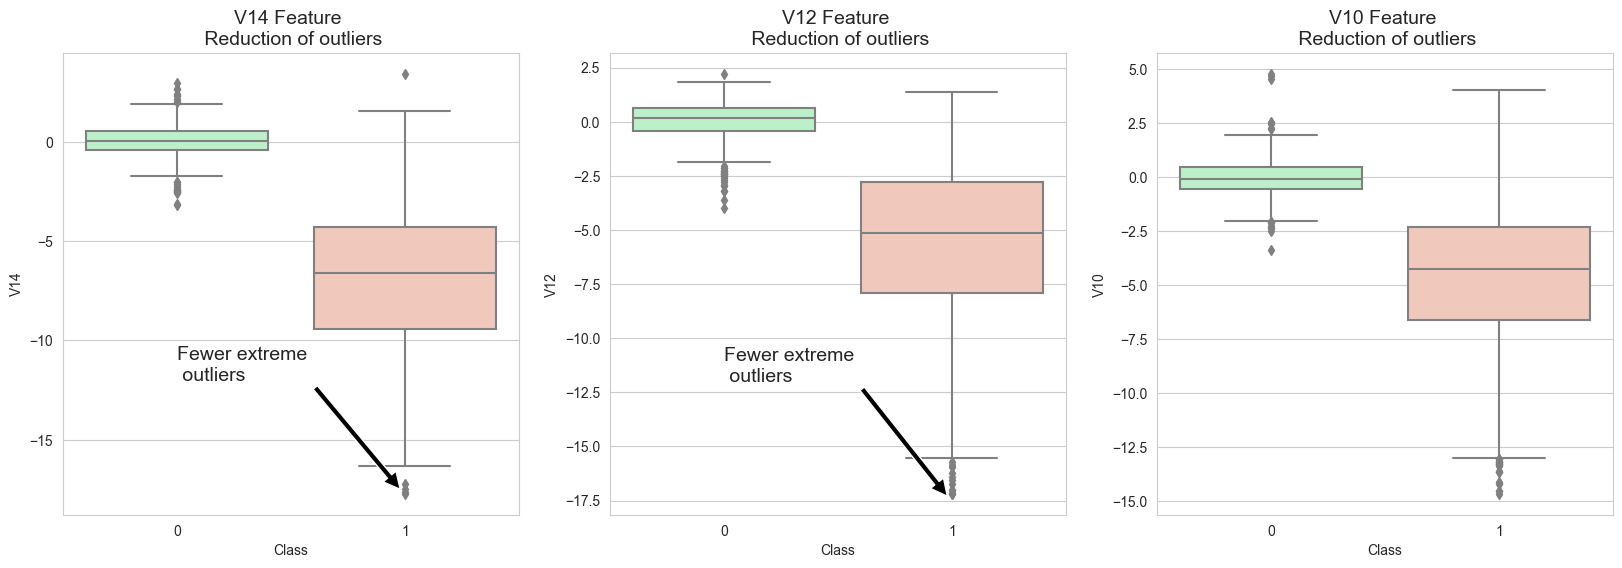

In [25]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Dimension Reduction and Clustering

- t-SNE
- PCA
- SVD


In [26]:
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

# t-SNE:
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"t-SNE took {t1-t0:.2} second")

t-SNE took 5.5 second


In [27]:
# PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"PCA took {t1 - t0:.2} seconds")

PCA took 1.9 seconds


In [28]:
# Truncated SVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm="randomized", random_state=42).fit_transform(X.values)
t1 = time.time()
print(f"Truncated SVD took {t1-t0:.2} seconds")

Truncated SVD took 1.2 seconds


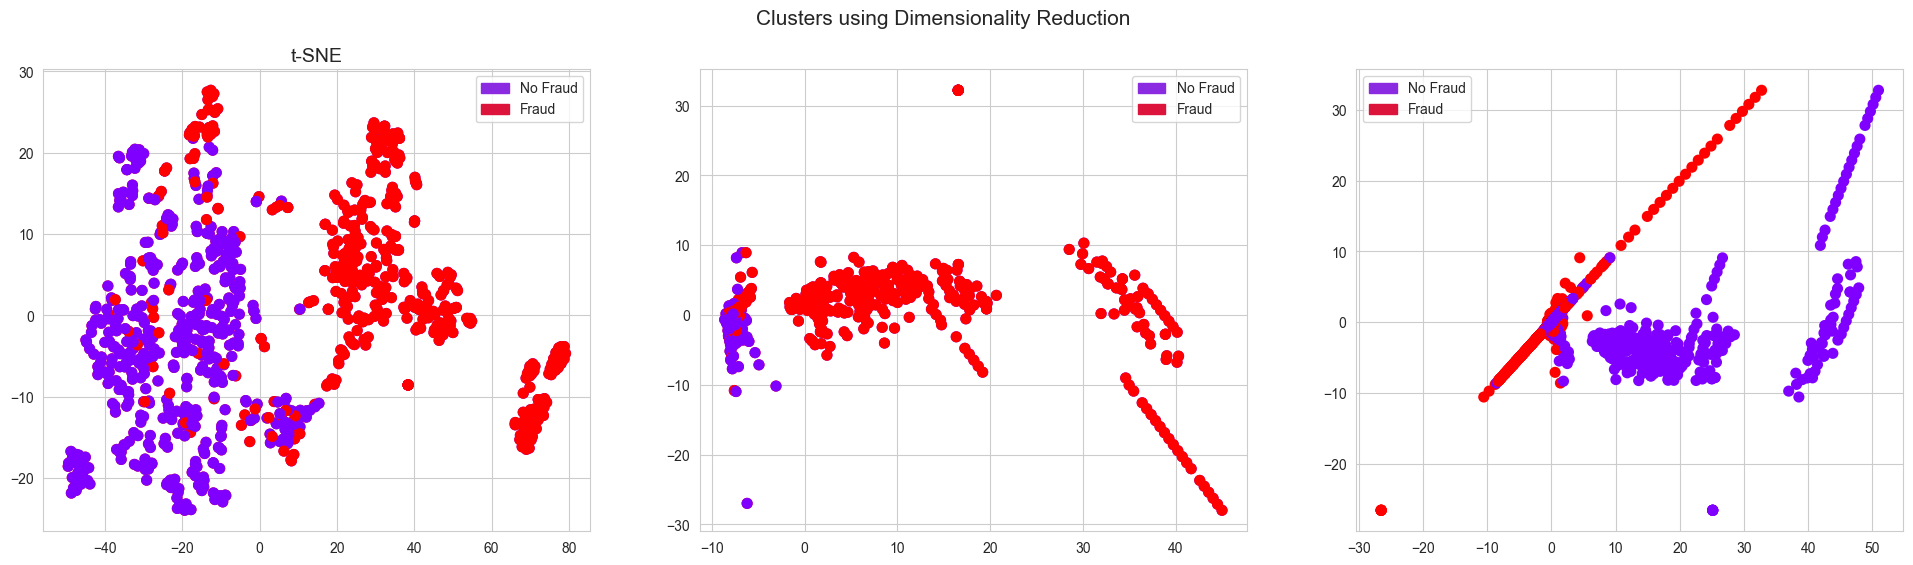

In [29]:
# Plotting results

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle("Clusters using Dimensionality Reduction", fontsize = 15)

blue_patch = mpatches.Patch(color="blueviolet", label="No Fraud")
orange_patch = mpatches.Patch(color="crimson", label="Fraud")

# t-SNE scatter plot 
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:, 1], c=(y==0), cmap="rainbow", label="No Fraud", linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:, 1], c=(y==1), cmap="rainbow", label="Fraud", linewidths=2)
ax1.set_title("t-SNE", fontsize=14)

ax1.grid(True)

ax1.legend(handles=(blue_patch, orange_patch))

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), cmap="rainbow", label="No Fraud", linewidth=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==1), cmap="rainbow", label="Fraud", linewidth=2)

ax2.grid(True)
ax2.legend(handles=(blue_patch, orange_patch))

# Truncated SVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y==0), cmap="rainbow", label="No Fraud", linewidth=2)
ax3.scatter(X_reduced_svd[:, 1], X_reduced_svd[:, 1], c=(y==1), cmap="rainbow", label="Fraud", linewidth=2)

ax3.grid(True)
ax3.legend(handles=(blue_patch, orange_patch))

plt.show();

## Modelling: Classifier imbalanced dataset

- Undersampling
- Oversampling

In [30]:
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

In [31]:
# Split train test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# For classification algorithms, we need to turn the values into an array

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [33]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [34]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifiers: {classifier.__class__.__name__}, has a training score of {round(training_score.mean(), 2) * 100}% accuracy score")

Classifiers: LogisticRegression, has a training score of 92.0% accuracy score
Classifiers: KNeighborsClassifier, has a training score of 92.0% accuracy score
Classifiers: SVC, has a training score of 92.0% accuracy score
Classifiers: DecisionTreeClassifier, has a training score of 90.0% accuracy score


In [35]:
# Optimize model by using gridsearchcv

# For Logistic Regression
log_reg_params = {"penalty": ["l1", "l2"],
                  "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# get the classifier with the best params searched
log_reg = grid_log_reg.best_estimator_

# For K Nearest Neighbors
knears_params = {"n_neighbors": list(range(2, 5, 1)),
                 "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# get the classifier with the best params searched
knears_neighbors = grid_knears.best_estimator_

# For Support Vector Classifier
svc_params = {"C": [0.5, 0.7, 0.9, 1],
              "kernel": ["rbf", "poly", "sigmoid", "linear"]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# get the best estimator
svc = grid_svc.best_estimator_

# For DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"],
               "max_depth": list(range(2, 4, 1)),
               "min_samples_leaf": list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# get the best estimator
tree_clf = grid_tree.best_estimator_

/Users/duongvu/.pyenv/versions/3.10.4/envs/fraud/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/duongvu/.pyenv/versions/3.10.4/envs/fraud/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/duongvu/.pyenv/versions/3.10.4/envs/fraud/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/duongvu/.pyenv/versions/3.10.4/envs/fraud/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/duongvu/.pyenv/versions/3.10.4/envs/fraud/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the numb

In [36]:
# Over fitting case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print(f"Logisic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%")

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print(f"K Nearest Neighbors Cross Validation Score: {round(knears_score.mean() * 100, 2)}%")

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print(f"Support Vector Classifier Cross Validation Score: {round(svc_score.mean() * 100, 2)}%")

tree_score = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print(f"Decision Tree Classifier Cross Validation Score: {round(tree_score.mean() * 100, 2)}%")

Logisic Regression Cross Validation Score: 93.01%
K Nearest Neighbors Cross Validation Score: 92.22%
Support Vector Classifier Cross Validation Score: 92.35%
Decision Tree Classifier Cross Validation Score: 92.74%


In [37]:
# Undersample during cross validation

undersample_X = df.drop("Class", axis=1)
undersample_y = df["Class"]

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print(f"Train: {train_index}, Test: {test_index}")
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_y.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss technique: distribution of nearmiss (to see how it distributes the labels we won't use)

X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print(f"NearMiss Label Distribution: {Counter(y_nearmiss)}")

# Cross validation
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy="majority"), log_reg) # SMOTE happens during cross validation
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))
    

Train: [ 56959  56960  56961 ... 284804 284805 284806], Test: [    0     1     2 ... 57005 57188 57405]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 56959  56960  56961 ... 113926 113927 113928]
Train: [     0      1      2 ... 284804 284805 284806], Test: [111086 112807 112821 ... 170890 170891 170892]
Train: [     0      1      2 ... 284804 284805 284806], Test: [166623 167827 169464 ... 227859 227860 227861]
Train: [     0      1      2 ... 227859 227860 227861], Test: [222423 222535 223156 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [66]:
# plot Logistic Regression Learning Curve

def plot_learning_curve(estimator_list, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    estimator1, estimator2, estimator3, estimator4 = estimator_list
    # First Estimator:
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="cornflowerblue")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="cornflowerblue", label="Training Score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=15)
    ax1.set_xlabel("Training size (m)")
    ax1.set_ylabel("Score")
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator:
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="cornflowerblue")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="cornflowerblue", label="Training Score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
    ax2.set_title("KNears Neighbors Leaning Curve", fontsize=15)
    ax2.set_xlabel("Training size (m)")
    ax2.set_ylabel("Score")
    ax2.grid(True)
    ax2.legend(loc="best")

    # Second Estimator:
    train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="cornflowerblue")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="cornflowerblue", label="Training Score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Leaning Curve", fontsize=15)
    ax3.set_xlabel("Training size (m)")
    ax3.set_ylabel("Score")
    ax3.grid(True)
    ax3.legend(loc="best")

    # Second Estimator:
    train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="cornflowerblue")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="cornflowerblue", label="Training Score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=15)
    ax4.set_xlabel("Training size (m)")
    ax4.set_ylabel("Score")
    ax4.grid(True)
    ax4.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/Users/duongvu/.pyenv/versions/3.10.4/envs/fraud/lib/python3.10/site-packages/matplotlib/pyplot.py'>

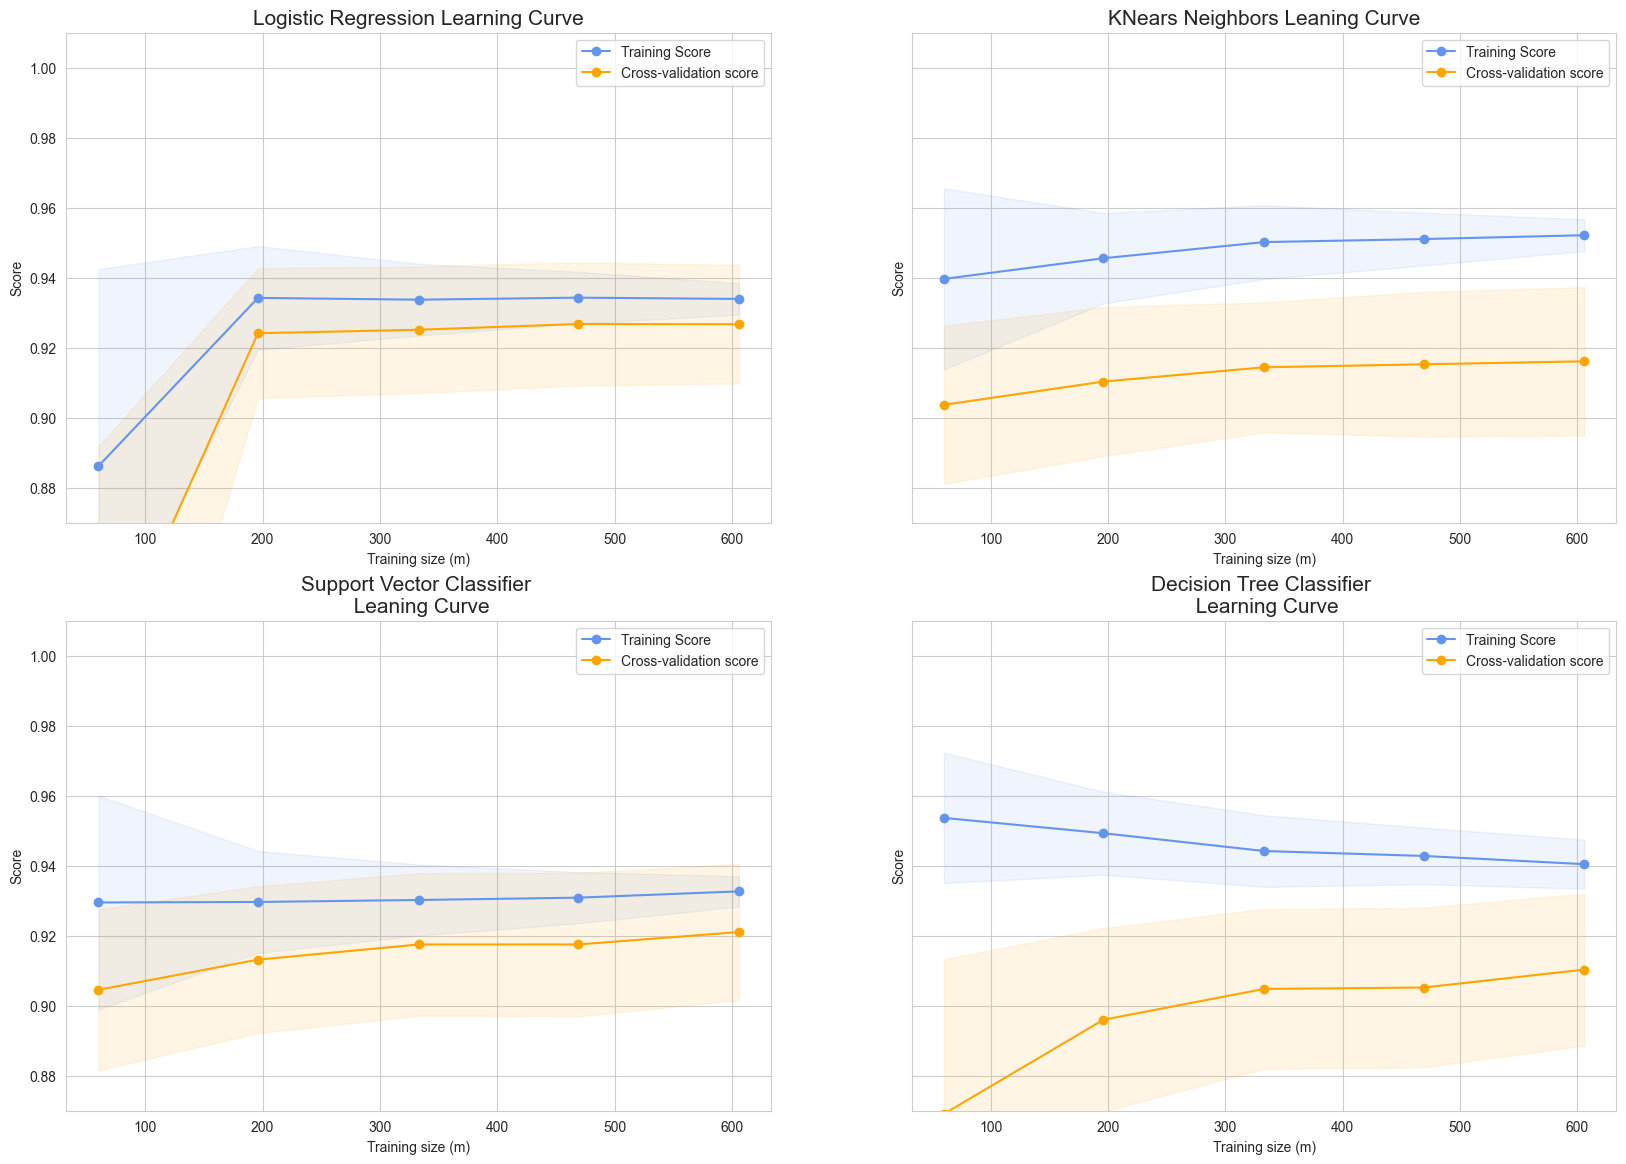

In [65]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator_list = [log_reg, knears_neighbors, svc, tree_clf]
plot_learning_curve(estimator_list, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [68]:
# create a dataframe to store all the scores and the classifiers namess

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [69]:
print(f"Logistic Regression: {roc_auc_score(y_train, log_reg_pred)}")
print(f"KNears Neighbors: {roc_auc_score(y_train, knears_pred)}")
print(f"Support Vector Classifier: {roc_auc_score(y_train, svc_pred)}")
print(f"Decision Tree Classifier: {roc_auc_score(y_train, tree_pred)}")

Logistic Regression: 0.9698699850116769
KNears Neighbors: 0.9207396563142668
Support Vector Classifier: 0.9762069085712294
Decision Tree Classifier: 0.9259263132210952


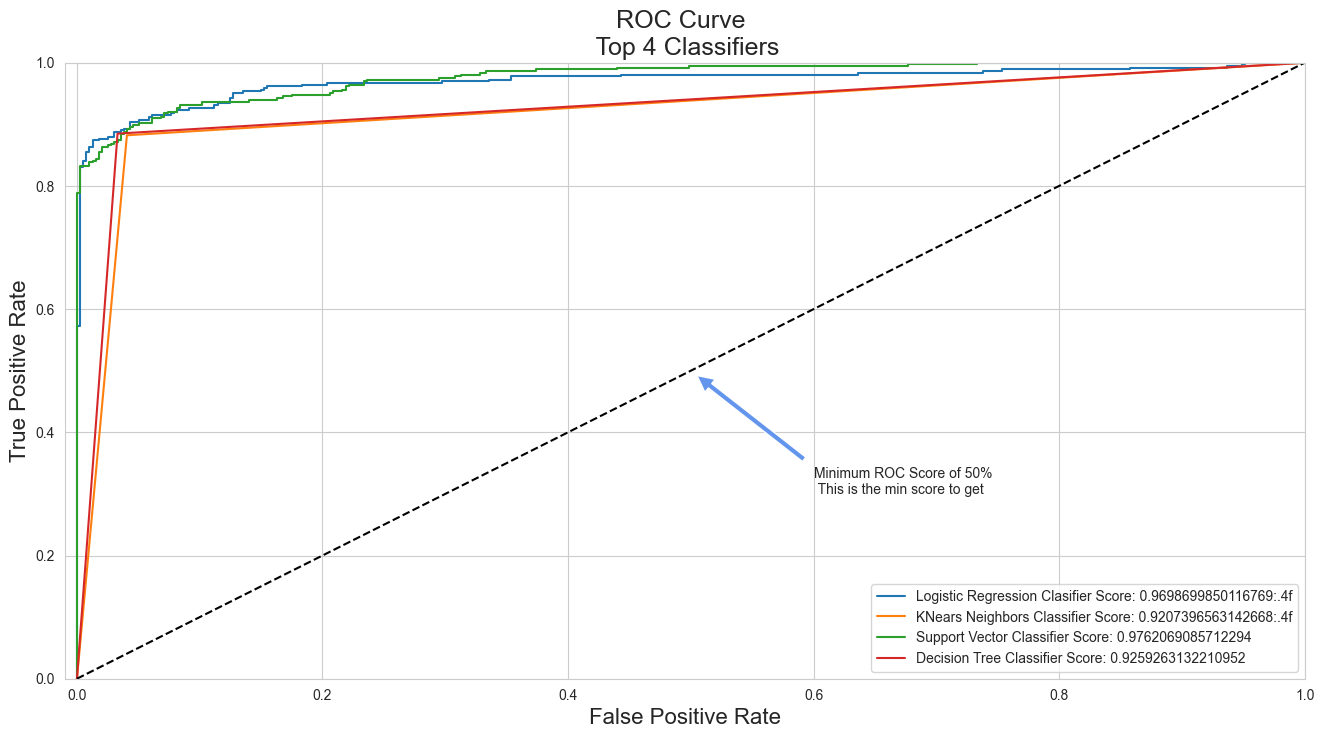

In [73]:
# Extract False Positive rate and True Positive Rate for each classifier

log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knears_fpr, knears_tpr, knears_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def plot_multiple_roc_curves(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title("ROC Curve \n Top 4 Classifiers", fontsize=18)
    plt.plot(log_fpr, log_tpr, label=f"Logistic Regression Clasifier Score: {roc_auc_score(y_train, log_reg_pred)}:.4f")
    plt.plot(knears_fpr, knears_tpr, label=f"KNears Neighbors Classifier Score: {roc_auc_score(y_train, knears_pred)}:.4f")
    plt.plot(svc_fpr, svc_tpr, label=f"Support Vector Classifier Score: {roc_auc_score(y_train, svc_pred)}")
    plt.plot(tree_fpr, tree_tpr, label=f"Decision Tree Classifier Score: {roc_auc_score(y_train, tree_pred)}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.annotate("Minimum ROC Score of 50% \n This is the min score to get", 
                 xy=(0.5, 0.5), xytext=(0.6, 0.3), 
                 arrowprops=dict(facecolor="cornflowerblue", shrink=0.05))
    plt.legend()

plot_multiple_roc_curves(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

### Both Logistic Regression and Support Vector Classifier has a high score. Let's dive deeper into one of them: Logistic Regression on the evaluation, specifically Precision and Recall

/var/folders/hl/4s_chnn92xd9x4ljbgc5nwnr0000gn/T/ipykernel_35542/3159005149.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(log_fpr, log_tpr, 'b-', linewidth=2, color="cornflowerblue")
/var/folders/hl/4s_chnn92xd9x4ljbgc5nwnr0000gn/T/ipykernel_35542/3159005149.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'r--', color="orange")


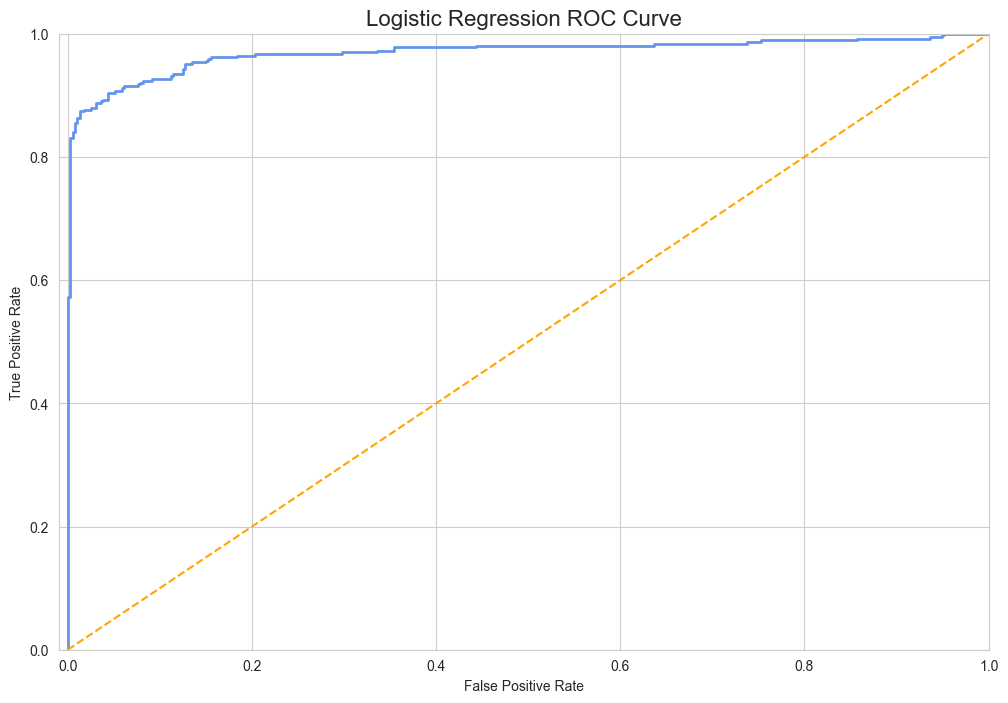

In [79]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12, 8))
    plt.title("Logistic Regression ROC Curve", fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2, color="cornflowerblue")
    plt.plot([0,1], [0,1], 'r--', color="orange")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.axis([-0.01, 1, 0, 1])

logistic_roc_curve(log_fpr, log_tpr)
plt.show();